# Capstone Webscrapping using BeautifulSoup
## Web Scraping pada Website kalibrr.id
Perkembangan teknologi AI (Artificial Intelligence) untuk penanganan Big Data semakin masif bergerak diberbagai bidang, 
sehingga kebutuhan akan perkejaan di bidang data juga akan meningkat seiring dengan meningkatnya
teknologi tersebut. Fungsi AI (Artificial Intelligence) akan sangat tergantung pada seberapa besar data yang tersedia dan 
darimana sumber data informasi tersebut didapatkan. 

Dalam praktiknya, Saat kita ingin menggali suatu informasi atau ingin mendapatkan insight,
Data tidaklah selalu tersedia dalam bentuk dataset lengkap yang siap untuk dianalisa
lebih lanjut.Diposisi dimana tidak ada dataset yang dimiliki, Web Scrapping bisa dijadikan salah satu
solusi untuk mendapatkan dataset dengan memanfaatkan website yang mau kita gali informasinya.

Web scraping (atau juga disebut sebagai web data mining atau web harvesting) adalah teknik pengambilan data dari halaman web secara otomatis dengan menggunakan perangkat lunak tertentu. Teknik ini digunakan untuk mengekstrak informasi dari berbagai situs web, termasuk teks, gambar, audio, video, dan informasi lainnya yang dapat diakses melalui jaringan internet.

Disini akan dibahas informasi tentang Peluang pekerjaan pada bidang kategori data yang diambil 
dari Website penyedia informasi pekerjaan yaitu kalinbrr.id serta insight apa saja yang didapat.
Dengan menggunakan Bahasa Pemrograman Python  an libary-libary pendukung seperti libary web parser BeautifulSoup,
Pandas Libary sebagai tools analsis, matplotlib untuk visualisasi dan juga Jupiter notebook untuk media pengkodean.

www.kalibrr.id adalah situs web yang menyediakan platform untuk pencarian pekerjaan dan rekrutmen di Indonesia. Situs ini memungkinkan perusahaan untuk memposting lowongan pekerjaan mereka dan mencari kandidat yang cocok untuk posisi tersebut, serta memungkinkan pencari kerja untuk mencari lowongan pekerjaan yang sesuai dengan kualifikasi dan minat mereka.

<img src="asset/kalibrr_id.png">

Pada pembahasan topik yang akan di scrapping adalah Lowongan perkerjaan dengan kategori "Data" pada website www.kalibrr.id


## Github

Hasil dari pembahasan sudah diupload dan dapat dilihat pada [Github](https://github.com/rusdipermana/webscrapping-id-kalibrr).


## Setting Virtual Environment , Kernel and Requirement Dependencies

Environment dan Kernel pada Jupyter Notebook berfungsi untuk memastikan bahwa dependensi dan pustaka yang digunakan pada proyek atau aplikasi tertentu terisolasi dan tidak mempengaruhi proyek atau aplikasi lain. Kernel, sebagai bagian inti dari sistem, bertanggung jawab untuk mengeksekusi kode dalam bahasa pemrograman tertentu dan dapat diganti sesuai kebutuhan.

a. Untuk Membuat Virtual Environment dan kernel, buka Anaconda Prompt dengan perintah sebagai berikut :

- conda create -n <ENV_NAME> python=3.10
- conda activate <ENV_NAME>
- conda install ipykernel
- python -m ipykernel install --user --name <ENV_NAME>

b. Requirement Dependencies, atau dependensi kebutuhan, adalah daftar pustaka, modul, atau perangkat lunak lainnya yang diperlukan oleh suatu program atau aplikasi untuk berjalan dengan benar. Dalam pengembangan perangkat lunak, daftar dependensi biasanya didefinisikan dalam sebuah file yang disebut "requirements file". Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages anda hanya perlu melakukan install pakage sebagai berikut :

- pip install -r requirements.txt --user

<img src="asset/install_requirements.png">

untuk memastikan seluruh dependecies sudah ter-install, kita bisa melakukan pengecekan dengan perintah berikut :

- conda list -n <ENY_NAME>

<img src="asset/capture_list_env.png">



Setelah membuat environment dan semua libary sudah diinstall, selanjutnya kita mulai dengan import semua libary yang dibutuhkan.

In [3]:
import requests
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd
from cgitb import text
import string
import matplotlib.pyplot as plt
import numpy as np
from cProfile import label
import calendar

c:\Users\rusdi\anaconda3\envs\vulcan_da\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\rusdi\anaconda3\envs\vulcan_da\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\rusdi\anaconda3\envs\vulcan_da\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Let's begin with requesting the web from the site with `get` method.

In [4]:
url = "https://www.kalibrr.id/job-board/te/data/co/Indonesia/1"
url_get = requests.get(url)
url_get

<Response [200]>

Hasil <Response [200]> menunjukkan bahwa permintaan telah berhasil dan server telah mengembalikan data yang diminta.

Fungsi pada BeatifulSoap yaitu find_all() dan find()

- Fungsi find_all() dalam BeautifulSoup digunakan untuk mengekstrak daftar semua elemen yang cocok dengan kriteria tertentu dari dokumen HTML atau XML yang telah diparsing.

- Fungsi find() pada BeautifulSoup digunakan untuk menemukan elemen pertama yang cocok dengan kriteria pencarian tertentu dalam dokumen HTML atau XML yang sudah diparsing. Jika elemen yang cocok ditemukan, fungsi find() akan mengembalikan objek BeautifulSoup yang merepresentasikan elemen tersebut.

In [5]:
def findAll(page_no) :
    url = "https://www.kalibrr.id/job-board/te/data/co/Indonesia/"
    pageFilter = "?sort=Freshness"

    url_get = requests.get(url+str(page_no))

    soup = BeautifulSoup(url_get.content,"html.parser")

    findAll = soup.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
    # print(len(findAll))
    return findAll

Selanjutnya dibuat metode untuk cleaning text, yang bisa digunakan ulang dan menjadikan nilai yang konsisten.

In [6]:
def pre_text(pretext):

    pretext = pretext.lower()
    pretext = pretext.translate(str.maketrans('', '', string.punctuation))
    pretext = ' '.join(pretext.split())
    pretext = pretext.strip()
    return pretext


Fungsi find() dapat menerima dua argumen utama yaitu nama tag HTML dan atribut yang ingin dicari, disini dibuatkan untuk menampung return list dari fungsi findAll()

In [7]:
def find(job) :

    job_company = job.select_one('div.k-col-start-3.k-row-start-3 a')
    if job_company is not None :
        # print('Company :',job_company.text.strip())
        job_company = pre_text(job_company.text)

    # for job_titles :
    job_title = job.select_one('div.k-col-start-3.k-row-start-1 h2 a')
    if job_title is not None:
        # print('Position :',job_title.text.strip())
        job_title = pre_text(job_title.text)

    # for job_locations :
    job_location = job.select_one('div.k-col-start-3.k-row-start-3 a.k-text-subdued.k-block')
    if job_location is not None :
        job_location = job_location.text.replace('\n', "").replace(',', '').strip()
        
        job_location = re.sub(r"\b(?:Indonesia|City|Kota|Kabupaten|Regency)\b", "", job_location, flags=re.IGNORECASE).strip()
        # print('Location :',job_location)
    
    # for date info     
    posted_info = job.select_one('div.k-col-start-5.k-row-start-1 span:first-of-type')
    if posted_info is not None :
        posted_info = posted_info.text.strip()
        published_at, application_deadline = posted_info.split("• Apply before")
        published_at = published_at.replace('ago', '').replace('Posted', '').strip()
        application_deadline = application_deadline.strip()

    job_data = [job_company, job_title, job_location, published_at, application_deadline]
    return job_data


Fungsi save_file() merupakan fungsi yang dibuat dari kombinasi fungsi findAll() dan find() dimana fungsi findAll() extract list element dan di looping satu persatu melalui fungsi find() dilanjutkan dengan memasukan setiap baris kedalam file csv

In [8]:
def save_file() :
    i = 0

    job_desc = findAll(page_no=page)
    # print("Total Save :",len(job_desc))

    for job in job_desc :
        i = i + 1
        job_info = find(job)
        csv.write(job_info[0]+ ',' + job_info[1] + ',' + job_info[2] + ',' + job_info[3] + "," + job_info[4]+ '\n')
        # print("save",i)


setelah beberapa fungsi sudah dibuat, dilanjutkan dengan membuka file dengan fungsi open() file csv dan ditutup dengan fungsi close().
Disini bisa ditentukan berapa page yang akan diambil di website kalibrr.id

In [9]:
csv=open("db_kalibrr.csv", 'w')
headers = "Company,Title,Location,Published_At,Application_Deadline\n"
csv.write(headers)


for page in range(1,29):

    print('Page :',page)

    save_file()

print('Scraping is successful !!')

csv.close()

Page : 1
Page : 2
Page : 3
Page : 4
Page : 5
Page : 6
Page : 7
Page : 8
Page : 9
Page : 10
Page : 11
Page : 12
Page : 13
Page : 14
Page : 15
Page : 16
Page : 17
Page : 18
Page : 19
Page : 20
Page : 21
Page : 22
Page : 23
Page : 24
Page : 25
Page : 26
Page : 27
Page : 28
Scraping is successful !!


# Data Pre-Processing

Setelah kita memiliki dataset yang didapatkan melalui proses webscrapping, selanjutnya dilakukan inpeksi data dengan mebuat objek dataframe pandas dari dataset file csv yang didapatkan dari hasil scraping.

In [10]:
df = pd.read_csv('db_kalibrr.csv')

lakukan pengecekan struktur data hasil dari scrapping.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               406 non-null    object
 1   Title                 406 non-null    object
 2   Location              406 non-null    object
 3   Published_At          406 non-null    object
 4   Application_Deadline  406 non-null    object
dtypes: object(5)
memory usage: 16.0+ KB



- Terdapat 225 Baris dari 15 Page yang di scrapping
- Terdapat 5 Kolom dimana setiap kolom tipe datanya adalah objek string

Selanjutnya dilakukan inspeksi apakah ada data duplicate

In [12]:
df.duplicated().value_counts()

False    307
True      99
Name: count, dtype: int64

Jika terdapat Nilai true maka menunjukan total dari baris yang memiliki nilai duplicate, maka perlu dilakukan penyesuai terhadap data duplicate tersebut.

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    307
Name: count, dtype: int64

Pastikan hasil penyesuaian tidak ada data yang duplicated, hasil dari penyesuaian diatas hanya menunjukan nilai False yang artinya tidak ada data duplicate. selanjutnya dilakukan pengecekan, apakah terdapat nilai yang kosong/null pada dataframe.

In [14]:
df.isna().sum()

Company                 0
Title                   0
Location                0
Published_At            0
Application_Deadline    0
dtype: int64

Terlihat dari hasil diatas, menunjukan tidak terdapat nilai null pada setiap kolom di objek dataframe

# Data Wrangling

Proses wrangling atau data wrangling adalah proses transformasi dan pembersihan data mentah (raw data) menjadi format yang lebih terstruktur dan siap digunakan untuk analisis data lebih lanjut.

### Data Location
Pada kolom location, tersimpan data lokasi tempat perkejaan diposting pada website www.kalibrr.id, selanjutnya akan dilakukan suatu analis guna mendapatkan insight bedasarkan lokasi perkerjaan, sebelumnya kita lihat nilai-nilai unik yang terdapat pada kolom "Location"

In [15]:
df['Location'].unique()

array(['Jakarta', 'Jakarta Barat', 'Tangerang', 'Central Jakarta',
       'North Jakarta', 'South Tangerang', 'South Jakarta',
       'Jakarta Selatan', 'Denpasar', 'East Jakarta', 'Surabaya',
       'Yogyakarta', 'Jakarta Pusat', 'Bandung', 'Mojokerto',
       'Jakarta Timur', 'Tangerang Selatan', 'West Jakarta', 'Makassar',
       'Surakarta', 'Bekasi', 'Bogor', 'Badung', 'Central Lampung',
       'Blitar', 'Balikpapan', 'Jakarta Utara', 'Sumbawa', 'Karawang',
       'Sleman', 'Semarang', 'Salatiga', 'Kediri', 'Pontianak',
       'Pekalongan', 'Samarinda', 'Bulungan', 'Sidoarjo', 'Berau'],
      dtype=object)

karena kita hanya ingin melihat lowongan perkerjaan yang terdapat di indonesia saja, maka perlu dilakukan penyesuaian data yaitu selain negara indonesia akan dihapus. (Jika ada tidak ada, skip bagian ini)

In [16]:
df = df[~df['Location'].str.contains('Philippines')]
df['Location'].unique()

array(['Jakarta', 'Jakarta Barat', 'Tangerang', 'Central Jakarta',
       'North Jakarta', 'South Tangerang', 'South Jakarta',
       'Jakarta Selatan', 'Denpasar', 'East Jakarta', 'Surabaya',
       'Yogyakarta', 'Jakarta Pusat', 'Bandung', 'Mojokerto',
       'Jakarta Timur', 'Tangerang Selatan', 'West Jakarta', 'Makassar',
       'Surakarta', 'Bekasi', 'Bogor', 'Badung', 'Central Lampung',
       'Blitar', 'Balikpapan', 'Jakarta Utara', 'Sumbawa', 'Karawang',
       'Sleman', 'Semarang', 'Salatiga', 'Kediri', 'Pontianak',
       'Pekalongan', 'Samarinda', 'Bulungan', 'Sidoarjo', 'Berau'],
      dtype=object)

Terlihat terdapat inkonsitensi nilai pada nama kota maka diperlukan berberapa proses cleaning text dimana output yang diharapkan akan menghasilkan nama kota/city, misalnya jakarta pusat,jakarta timur dll akan digabungkan menjadi 1 kata yaitu "Jakarta" dan juga akan dilakukan proses yang sama dikota-kota yang terdapat nilai inkonsistensi pada kolom "Location".

In [17]:


df_1 = df.copy()

# Replace values in 'Location' column with 'Jakarta' if they match any value in 'kota_ubah' for Jakarta
kota_ubah_jkt = df_1[df_1['Location'].str.contains('jakarta', case=False)]
replace_dict_jkt = {k: 'Jakarta' for k in kota_ubah_jkt['Location'].unique()}
df_1['Location'] = df_1['Location'].replace(replace_dict_jkt)

# Replace values in 'Location' column with 'Tangerang' if they match any value in 'kota_ubah' for Tangerang
kota_ubah_tgr = df_1[df_1['Location'].str.contains('tangerang', case=False)]
replace_dict_tgr = {k: 'Tangerang' for k in kota_ubah_tgr['Location'].unique()}
df_1['Location'] = df_1['Location'].replace(replace_dict_tgr)

# Replace values in 'Location' column with 'Tangerang' if they match any value in 'kota_ubah' for Tangerang
kota_ubah_tgr = df_1[df_1['Location'].str.contains('Lampung', case=False)]
replace_dict_tgr = {k: 'Lampung' for k in kota_ubah_tgr['Location'].unique()}
df_1['Location'] = df_1['Location'].replace(replace_dict_tgr)

# Sort and count the values in the 'Location' column
city_dict = df_1['Location'].sort_values(ascending=False).value_counts()

city_dict



Location
Jakarta       213
Tangerang      50
Bandung         5
Denpasar        4
Yogyakarta      3
Surabaya        3
Bogor           3
Semarang        3
Pontianak       2
Blitar          2
Makassar        2
Sumbawa         2
Pekalongan      1
Mojokerto       1
Salatiga        1
Lampung         1
Kediri          1
Karawang        1
Samarinda       1
Sidoarjo        1
Bulungan        1
Sleman          1
Berau           1
Bekasi          1
Surakarta       1
Balikpapan      1
Badung          1
Name: count, dtype: int64

Terlihat pada hasil cleaning text, Objeck series menunjukan hasil nilai yang konsisten yaitu berupa nama kota pada kolom lokasi. Dikarenakan ditemukan nilai yang berulang dan untuk mengoptimalkan penggunaan memory, pada kolom lokasi akan dirubah tipe datanya menjadi category.

In [18]:
df_1.dtypes

Company                 object
Title                   object
Location                object
Published_At            object
Application_Deadline    object
dtype: object

In [19]:
df_1['Location'] = df_1['Location'].astype('category')
df_1.dtypes

Company                   object
Title                     object
Location                category
Published_At              object
Application_Deadline      object
dtype: object

Prose convert tipe data dari objeck string ke category sudah berhasil, Selanjutnya kita lihat nilai unik pada kolom 'Published_At'.

### Data Publish

Data publish tersimpan pada kolom "Published_At" yang memiliki informasi sejak kapan info lowongan perkerjaan di publish/ di posting di website www.kalibrr.id. mari kita lihat nilai unik yang terdapat pada kolom "Published_At"

In [20]:
df_1['Published_At'].unique()

array(['4 days', '9 days', '10 days', 'a month', '8 days', '2 days',
       'a day', '2 months', '7 days', '3 days', '4 hours', '17 days',
       '16 days', '15 days', '24 days', '25 days', '14 days', '3 months',
       '4 months', '9 hours', '6 hours', '6 months', '5 months',
       '22 days', '8 months', '10 months', '9 months', '5 hours',
       '23 days', '3 hours'], dtype=object)

kolom 'Published_At' memberikan informasi SEJAK kapan lowongan perkerjaan diposting namun bukan memberikan informasi waktu yang lengkap, kapan tepatnya tanggal lowongan perkejaan itu diposting maka diperlukan kolom baru dengan nama "Posted_Date" yang berisikan tanggal lowongan perkerjaan diposting. Disini akan memanfaatkan pandas timedelta untuk mendapatkan tanggal yang diinginkan berdasarkan parameter kolom 'Published_At'

In [21]:
# fungsi untuk mengubah nilai menjadi timedelta jika dapat diubah
def to_timedelta(val):
    try:
        return pd.Timedelta(val)
    except:
        pass
    try:
        if 'years' in val:
            val = val.replace('years', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'year' in val:
            val = val.replace('year', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'months' in val:
            val = val.replace('months', '').strip()
            return int(val) * pd.Timedelta(days=30)
        if 'days' in val:
            val = val.replace('days', '').strip()
            return pd.Timedelta(days=int(val))
        if 'month' in val:
            return pd.Timedelta(days=30)
        if 'day' in val:
            return pd.Timedelta(days=1)
        # if 'hours' in val:
        #     return pd.Timedelta(days=1)
        if 'minute' in val:
            val = val.replace('minute', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'minutes' in val:
            val = val.replace('minutes', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hour' in val:
            val = val.replace('an', '1').replace('hour', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hours' in val:
            val = val.replace('hours', '').strip()
            return pd.Timedelta(minutes=int(val))
    except:
        pass
    return np.nan

now = pd.Timestamp.now()
# konversi kolom posted_date menjadi timedelta
df_1['Posted_Date'] = df_1['Published_At'].apply(to_timedelta)
df_1['Posted_Date'] = now - df_1['Posted_Date']
df_1['Posted_Date'] = df_1['Posted_Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
df_1['Posted_Date'] = pd.to_datetime(df_1['Posted_Date'], format='%d-%m-%Y')


Setelah pembuatan tanggal posting, selanjutnya dilakukan peninjauan dan pernyortiran data.

In [22]:
get_post = df_1[['Published_At', 'Posted_Date']].value_counts()
sorted_get_post = get_post.sort_index(level=['Posted_Date'], ascending=True)
sorted_get_post

Published_At  Posted_Date
10 months     2022-07-16      3
9 months      2022-08-15      1
8 months      2022-09-14      4
6 months      2022-11-13      2
5 months      2022-12-13      4
4 months      2023-01-12     10
3 months      2023-02-11     12
2 months      2023-03-13     37
a month       2023-04-12     78
25 days       2023-04-17     10
24 days       2023-04-18     11
23 days       2023-04-19      1
22 days       2023-04-20      2
17 days       2023-04-25      7
16 days       2023-04-26      5
15 days       2023-04-27      9
14 days       2023-04-28      3
10 days       2023-05-02     18
9 days        2023-05-03      6
8 days        2023-05-04      8
7 days        2023-05-05     10
4 days        2023-05-08     17
3 days        2023-05-09     13
2 days        2023-05-10     13
a day         2023-05-11     14
3 hours       2023-05-12      1
4 hours       2023-05-12      2
5 hours       2023-05-12      2
6 hours       2023-05-12      1
9 hours       2023-05-12      3
Name: count, d

Karena kita hanya ingin melihat data posting pada tahun 2023 maka diperlukan penyesuaian terhadap tahun 2022 agar tidak ditampilkan

In [23]:
# Filter data dengan tahun 2023 pada kolom 'Posted_Date'
df_1 = df_1[df_1['Posted_Date'].dt.year == 2023]
df_1['Posted_Date'].value_counts().sort_index(level=['Posted_Date'], ascending=True)

Posted_Date
2023-01-12    10
2023-02-11    12
2023-03-13    37
2023-04-12    78
2023-04-17    10
2023-04-18    11
2023-04-19     1
2023-04-20     2
2023-04-25     7
2023-04-26     5
2023-04-27     9
2023-04-28     3
2023-05-02    18
2023-05-03     6
2023-05-04     8
2023-05-05    10
2023-05-08    17
2023-05-09    13
2023-05-10    13
2023-05-11    14
2023-05-12     9
Name: count, dtype: int64

Untuk dapat melihat data spesifik untuk data per-bulan maka diperlukan kolom yang hanya menampung nama dari bulan. dibuatkan kolom "publish_month" yang menampung partisi nama bulan.

In [24]:
df_1['publish_month'] = df_1['Posted_Date'].dt.month_name()
df_1['publish_month'].value_counts().sort_index(level=['publish_month'], ascending=True)

publish_month
April       126
February     12
January      10
March        37
May         108
Name: count, dtype: int64

### Data Batas Submit Lamaran

Informasi data batas penyerahan/submit lamaran pekerjaan disimpan dalam kolom "Appliction_Dateline". Untuk kolom "Application_Deadline" memiliki kasus yang sama yaitu tidak menyediakan informasi tanggal yang tepat kapan batas waktu penyerahan lamaran. maka diperlukan kolom baru "Deadline_Date untuk menampung tanggal batas waktu terakhir penyerahan lamaran pekerjaan.

In [25]:
df_1['Application_Deadline'].unique()

array(['19 May', '30 May', '4 Jun', '1 Jul', '29 Jun', '30 Jul', '9 Jun',
       '29 Jul', '14 May', '3 Jul', '27 May', '11 Dec', '25 May',
       '29 May', '23 May', '30 Dec', '25 Apr', '9 Jul', '8 Dec', '7 Jul',
       '30 Jun', '10 Jul', '6 Jul', '24 Nov', '1 Oct', '15 Jun', '20 Sep',
       '16 May', '30 Aug', '12 Jun', '7 Aug', '29 Sep', '12 May',
       '29 Dec', '18 Jun', '3 Oct', '12 Dec', '2 Jul', '10 Jun', '29 Aug',
       '21 May', '26 May', '18 Aug', '9 Nov', '24 Aug', '24 May',
       '11 Jun', '19 Sep', '17 May', '15 May', '19 Jun', '16 Jun',
       '7 Dec', '26 Jun', '8 Jun', '15 Dec', '1 Jun', '28 Jun', '25 Jun',
       '27 Dec', '24 Dec', '26 Oct', '9 Aug', '14 Jun', '9 Dec', '8 Jul',
       '3 Jun', '22 May', '17 Mar', '20 May', '24 Jun', '6 Jun', '13 May',
       '18 May', '31 May', '11 Aug', '6 Apr', '28 May', '30 Jan',
       '13 Jun', '27 Jun', '14 Jul'], dtype=object)

untuk mendapatkan tanggal yang diinginkan, perlu penyesuaian nama bulan dan diberikan tahun sehingga menjadikan info lengkap tentang tanggal berapa batas terakhir submit lamaran

In [26]:
month_dict = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}
df_1['Application_Deadline'] = df_1['Application_Deadline'].apply(lambda x: ' '.join([month_dict[i] if i in month_dict else i for i in x.split()]))
df_1['Deadline_Date'] = df_1['Application_Deadline'].apply(lambda x: x + ' 2023')
df_1['Deadline_Date'] = pd.to_datetime(df_1['Deadline_Date'], format='%d %B %Y')

In [27]:
df_1[df_1['Deadline_Date'].dt.month == 3][['Company','Posted_Date','Application_Deadline','Deadline_Date']]

,Company,Posted_Date,Application_Deadline,Deadline_Date
191,investree,2023-03-13,17 March,2023-03-17
376,dans multi pro,2023-03-13,17 March,2023-03-17


Dibuatkan juga kolom baru yang berisi nama bulan hasil dari "Deadline_Date".

In [28]:
df_1['deadline_month'] = df_1['Deadline_Date'].dt.month_name()
df_1['deadline_month'].value_counts().sort_index(level=['deadline_month'], ascending=True)

deadline_month
April         3
August       12
December     28
January       1
July         55
June         91
March         2
May          92
November      2
October       3
September     4
Name: count, dtype: int64

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               293 non-null    object        
 1   Title                 293 non-null    object        
 2   Location              293 non-null    category      
 3   Published_At          293 non-null    object        
 4   Application_Deadline  293 non-null    object        
 5   Posted_Date           293 non-null    datetime64[ns]
 6   publish_month         293 non-null    object        
 7   Deadline_Date         293 non-null    datetime64[ns]
 8   deadline_month        293 non-null    object        
dtypes: category(1), datetime64[ns](2), object(6)
memory usage: 22.1+ KB


# Data Visualization & Analysis

### 1. Top 5 Lokasi Pekerjaan dalam bidang "Data"

Pada tahap ini, dibuatkan visualisasi untuk 5 Kota yang memiliki frekuensi terbesar untuk penempatan pekerja di bidang kategori Data pada website kalibrr.id.

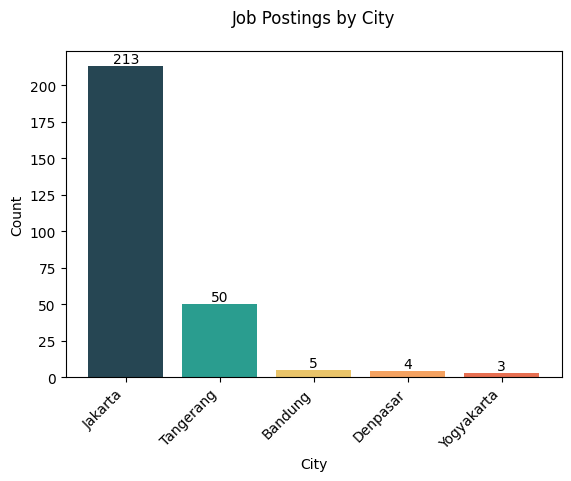

<Figure size 1000x600 with 0 Axes>

In [30]:
city_dict
city_dict = city_dict.head()
# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(city_dict.index, city_dict.values, color=colors)
# menambahkan angka hasil data ke diagram
for x, y in zip(city_dict.index, city_dict.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
# menambahkan label sumbu x dan y
plt.xlabel('City')
plt.ylabel('Count')
# menambahkan judul diagram
plt.title('Job Postings by City', pad=20)
#Merubah Backrground
plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))
# menampilkan diagram
plt.show()

Bedasarkan hasil dari Diagram Top 5 Lokasi Pekerjaan dalam bidang "Data" diatas, maka didapatkan insight sebagai berikut :

1. Untuk pekerjaan pada kategori dibidang "Data", Jakarta memiliki jumlah kejadian tertinggi dari semua lokasi yang terdaftar di website ww.kalibrr.id. Hal ini dapat menjadi informasi yang berguna bagi para pengambil keputusan untuk memperhatikan Jakarta secara lebih khusus.

2. Tangerang merupakan lokasi kedua dengan jumlah kejadian yang signifikan, meskipun jumlahnya jauh lebih rendah dari Jakarta. Hal ini dapat menjadi perhatian bagi para pengambil keputusan di Tangerang untuk memperbaiki atau mempertahankan kondisi yang sudah baik agar tetap menarik bagi para pengusaha.

3. Bandung, Surabaya, dan Bogor memiliki jumlah kejadian yang lebih sedikit dibandingkan Jakarta dan Tangerang. Namun, hal ini tidak berarti bahwa keadaan di daerah-daerah tersebut kurang penting. Karena setiap daerah memiliki keunikan dan potensi yang berbeda-beda, maka penting bagi para pengambil keputusan untuk mengidentifikasi kelebihan dan kekurangan masing-masing daerah untuk mengambil langkah yang tepat dalam mengembangkan daerah tersebut.

### 2. Jumlah Frekuensi posting lamaran yang masih aktif

Kita lihat frekuensi data perbulan yang terposting dari tanggal 01 Januari 2023 sampai dengan 12 Mei 2023 di website www.kalibrr.id.

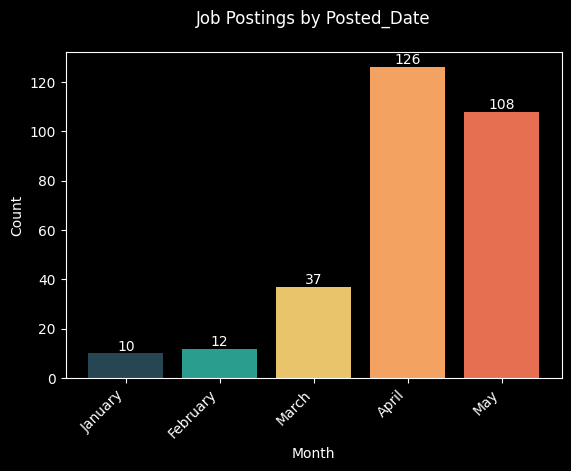

<Figure size 1000x600 with 0 Axes>

In [31]:
post_month = df_1['publish_month'].value_counts().sort_index()
post_month = post_month.sort_values(key=lambda x: [list(calendar.month_name).index(i) for i in x.index])
# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(post_month.index, post_month.values, color=colors)
# menambahkan angka hasil data ke diagram
for x, y in zip(post_month.index, post_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
# menambahkan label sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Count')
# menambahkan judul diagram
plt.title('Job Postings by Posted_Date', pad=20)
#Merubah Backrground
plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))
# menampilkan diaagram
plt.show()

Dari diagram terlihat bahwa bulan April memiliki jumlah postingan terbanyak dengan 121 postingan, diikuti oleh bulan Mei dengan 109 postingan, hal ini terkait dengan data yang diambil pada bulan mei hanya sampai dengan Tanggal 12 mei 2023 dimana capstone project ini dibuat. Jumlah postingan pada bulan-bulan lainnya jauh lebih sedikit, bulan Maret memiliki 37 postingan, bulan Februari dengan 11 postingan, dan bulan Januari dengan 13 postingan.
Faktor yang mempengauhi sedikitnya frekuensi pada bulan january, february dan march dikarenakan Postingan tersebut memiliki masa batas submit lamaran yang sudah habis sehingga sudah tidak dimunculkan kembali/dihapus oleh company yang memposting di website ww.kalibrr.com.

Selanjutnya mari kita lihat job posting yang memiliki deadline submit lamaran perkerjaan yang masih terpublish di website ww.kalibrr.id

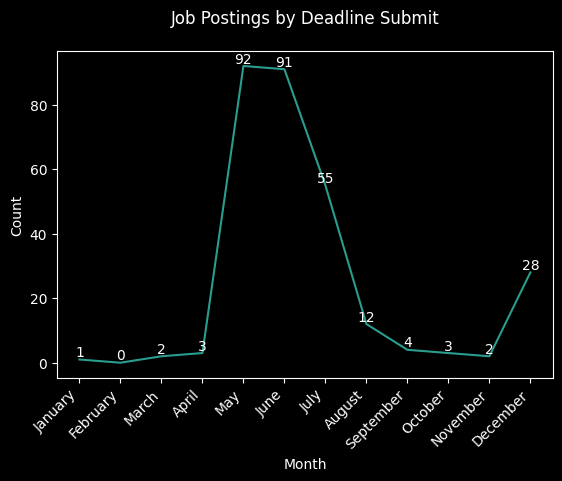

In [34]:
import calendar

deadline_month = df_1['deadline_month'].value_counts().sort_index()
deadline_month = deadline_month.sort_values(key=lambda x: [list(calendar.month_name).index(i) for i in x.index])


# Menambahkan bulan Januari, Februari, dan Maret dengan nilai 0
deadline_month = deadline_month.reindex(calendar.month_name[1:], fill_value=0)
deadline_month = deadline_month.sort_values(key=lambda x: [list(calendar.month_name).index(i) for i in x.index])


# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)
# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')
# membuat diagram garis
plt.plot(deadline_month.index, deadline_month.values, color='#2a9d8f')
# menambahkan angka hasil data ke diagram
for x, y in zip(deadline_month.index, deadline_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
# menambahkan label sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Count')
# menambahkan judul diagram
plt.title('Job Postings by Deadline Submit', pad=20)

# menampilkan diagram
plt.show()

- Pada pembahasan ini dibuat, range data hasil scrapping adalah 01 Januari 2023 sd 12 Mei 2023, dapat liat lihat dari diagram line bahwa untuk dibulan yang sama dan 1 bulan kedepan masih menunjukan angka tertinggi untuk batas waktu penyerahan lamaran.
- Untuk bulan-bulan sebelumnya menunjukan angka terendah karena terkait dengan batas penyerahan lamaran yang sudah tidak berlaku lagi sehingga sudah postingan sudah tidak muncul pada website www.kalibrr.com.
- Hal ini berkorelasi dari insight sebelumya dari Posted_Date dimana menunjukan angka yang rendah dikarenakan postingan lowongan pekerjaan tersebut memiliki batas lamaran yang sudah kadaluarsa.


## Conclusion

Bedasarkan hasil dari analisa diatas, memberikan insight Pada Perkerjaan kategori "Data" yaitu :

1. Masih banyaknya perusahaan yang memberi pekerjaan pada kategori data yang tersedia di website www.kalibrr.id
2. Jakarta merupakan lokasi tertinggi untuk lowongan perkejaan pada kategori "Data", hal ini terkait jakarta masih menjadi pusat bisnis di Indonesia
3. Saat anda mencari perkerjaan di website www.kalibrr.id, tersedia lowongan dengan batas penyerahan lamaran untuk 1 bulan kedepan, namun anda tetap memperhatikan kecepatan dalam mengirimkan lamaran agar tidak tersaingi oleh pencari kerja lainnya. bisa saja saat anda melamar dan walapun batas lamarannya tersedia namun perusahaan sudah mendapatkan calon yang cocok untuk menempati posisi yang ada.

## The Final Report with The Flask Dashboard

Pada pembahasan hasil webscrapping, sudah diimplentasikan melalui webiste dengan memanfaatkan framework flask. Silakan merujuk pada file app.py untuk menjalankannya

# Terima Kasih